In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy.signal as signal


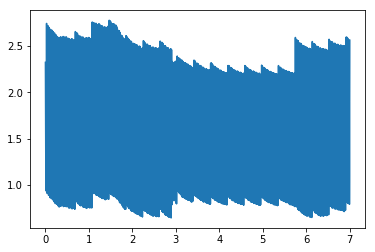

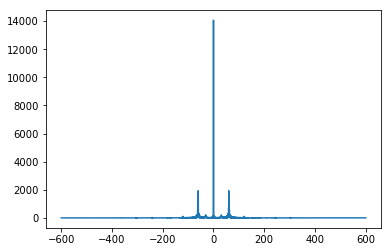

In [2]:
x = np.loadtxt("./archive/data.txt")
fs = 1200
t = np.linspace(0, x.shape[0]/fs, x.shape[0])
f = np.linspace(-fs/2, fs/2,  x.shape[0])


plt.plot(t, x)
plt.show()
X =np.abs(np.fft.fftshift(np.fft.fft(x)))
plt.plot(f, X)
plt.show()


## LOW PASS

In [3]:
# from http://scipy-cookbook.readthedocs.io/items/ButterworthBandpass.html
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = signal.butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = signal.lfilter(b, a, data)
    return y

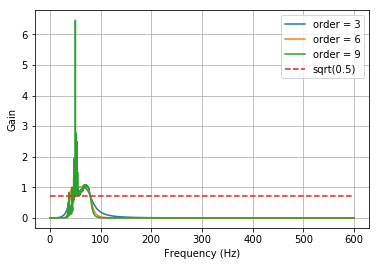

In [4]:
lowcut = 40.0
highcut = 80.0
# Plot the frequency response for a few different orders.
for order in [3, 6, 9]:
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    w, h = signal.freqz(b, a, worN=2000)
    plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)
plt.plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)],'--', label='sqrt(0.5)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid(True)
plt.legend(loc='best')   

# Filter a noisy signal.

plt.show()

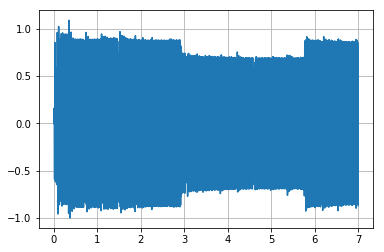

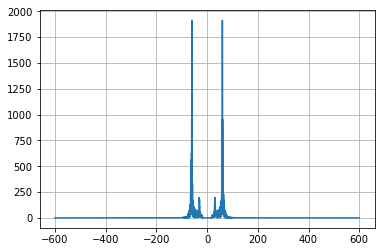

In [5]:
lowcut = 20.0
highcut = 70.0

y = butter_bandpass_filter(x, lowcut, highcut, fs, order=6)
plt.plot(t,y)
plt.grid()
plt.show()
plt.plot(f, np.abs(np.fft.fftshift(np.fft.fft(y))))
plt.grid()
plt.show()

## LOW PASS

In [6]:
def butter_lowpass(highcut, fs, order=5):
    nyq = 0.5 * (2*fs*np.pi)
    high = highcut / nyq
    b, a = signal.butter(order, high, btype='low')
    return b, a


def butter_lowpass_filter(data, highcut, fs, order=5):
    b, a = butter_lowpass(highcut, fs, order=order)
    y = signal.lfilter(b, a, data)
    return y

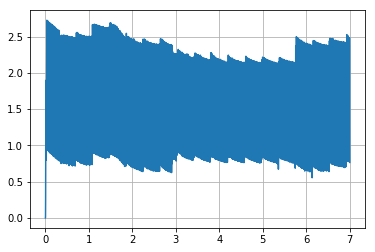

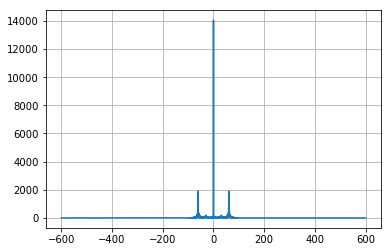

In [7]:

highcut = 500.0

y = butter_lowpass_filter(x, highcut, fs, order=6)
plt.plot(t,y)
plt.grid()
plt.show()
plt.plot(f, np.abs(np.fft.fftshift(np.fft.fft(y))))
plt.grid()
plt.show()

## HIGH PASS

In [8]:
def butter_highpass(lowcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    b, a = signal.butter(order, low, btype='highpass')
    return b, a


def butter_highpass_filter(data, lowcut, fs, order=5):
    b, a = butter_highpass(lowcut, fs, order=order)
    y = signal.lfilter(b, a, data)
    return y

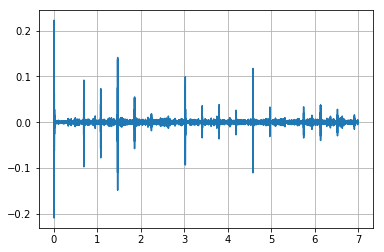

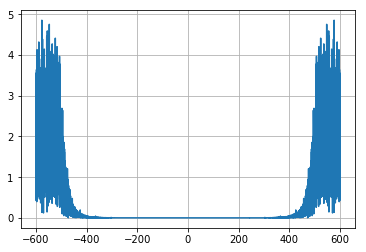

In [9]:

lowcut = 1.0

y = butter_highpass_filter(x, highcut, fs, order=6)
plt.plot(t,y)
plt.grid()
plt.show()
plt.plot(f, np.abs(np.fft.fftshift(np.fft.fft(y))))
plt.grid()
plt.show()

## BandStop

In [10]:

def butter_stopband(lowcut, cut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    ct = cut / nyq
    high = highcut / nyq
    b, a = signal.butter(order, [low, ct, high], btype='bandstop')
    return b, a


def butter_stopband_filter(data, lowcut, cut, highcut, fs, order=5):
    b, a = butter_stopband(lowcut, cut, highcut, fs, order=order)
    y = signal.lfilter(b, a, data)
    return y

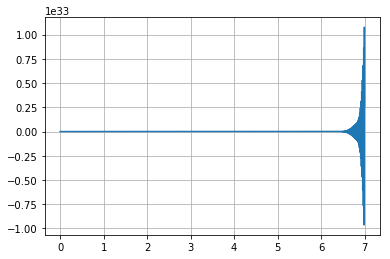

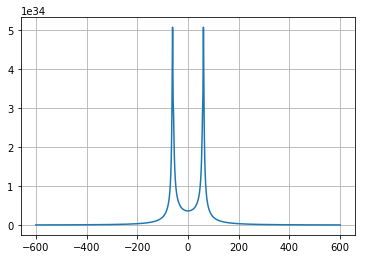

In [11]:
lowcut = 59.0
cut = 60.0
highcut = 62.0

fs = 1200.0
y = butter_stopband_filter(x, lowcut, cut,highcut, fs, order=6)
plt.plot(t,y)
plt.grid()
plt.show()
plt.plot(f, np.abs(np.fft.fftshift(np.fft.fft(y))))
plt.grid()
plt.show()

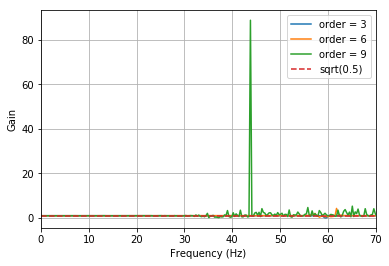

In [12]:
for order in [3, 6, 9]:
    b, a = butter_stopband(lowcut, cut, highcut, fs, order=order)
    w, h = signal.freqz(b, a, worN=2000)
    plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)
plt.plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)],'--', label='sqrt(0.5)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid(True)
plt.legend(loc='best')
plt.xlim(0, 70)
plt.show()


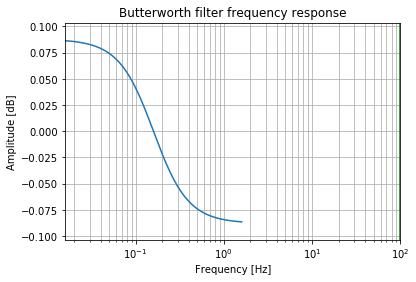

In [13]:

b, a = butter_stopband(lowcut, cut, highcut, fs, order=6)
w, h = signal.freqs(b, a)
plt.semilogx(w*0.5/np.pi, 20 * np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.show()

## Testing 

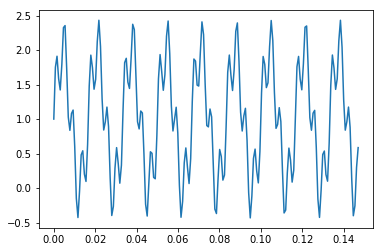

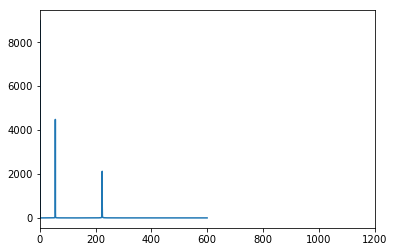

In [58]:
#sinal em 240hz e ruido em 60hz
x = 1 + np.sin(2*np.pi*60*t) + 0.5*np.sin(2*np.pi*240*t)
plt.plot(t[:190],x[:190])
plt.show()
X = np.abs(np.fft.fftshift(np.fft.fft(x)))
plt.plot(f, X)
plt.xlim(0, 1200)
plt.show()

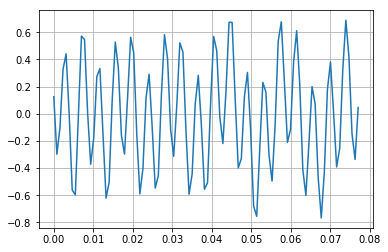

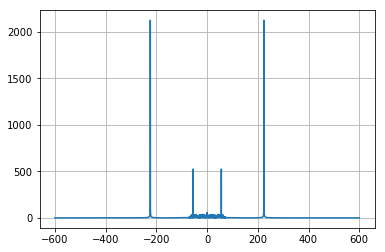

In [84]:
lowcut = 56.5
cut = 60.5
highcut = 64.5

fs = 1200.0
y = butter_highpass_filter(x, 62, fs, order=20)
plt.plot(t[:100],y[:100])
plt.grid()
plt.show()
plt.plot(f, np.abs(np.fft.fftshift(np.fft.fft(y))))
plt.grid()
plt.show()

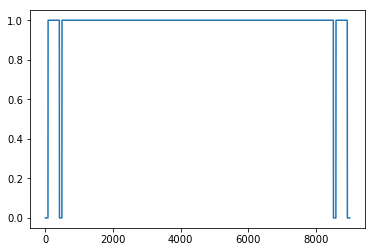

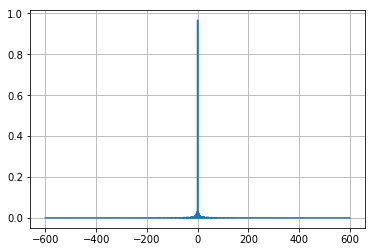

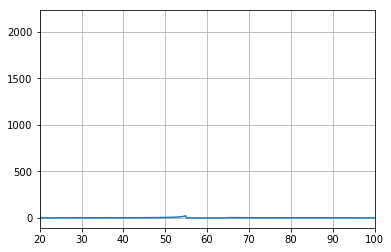

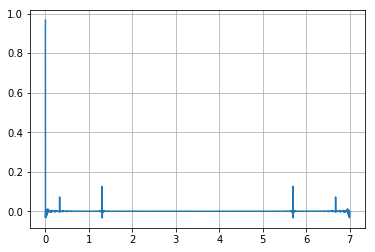

In [96]:
def filter_kernel(size, fhp, f1, f2):
    kernel = np.ones(size)
    fh = int(fhp/(fs)*x.shape[0])
    fsp1 =  int(f1/(fs)*x.shape[0])
    fsp2 =  int(f2/(fs)*x.shape[0])
    #flp = int(fmax/(fs)*x.shape[0])

    for i in xrange(0, x.shape[0]):
        if (i <=fh) or ((i>=fsp1)and(i<=fsp2)): 
            kernel[i] = 0
            kernel[-i] = 0
        
    return kernel

def filter(x, kernel):
    return np.fft.ifft(np.multiply(x, kernel)).real

kernel = filter_kernel(x.shape[0], 10.0, 55.0, 65.0)
plt.plot(kernel)
plt.show()


cv = np.fft.ifft(kernel)
plt.plot(f, np.abs(np.fft.fftshift(cv)))
plt.grid()
plt.show()


Xc = np.multiply(np.fft.fft(x), kernel)
plt.plot(f, np.abs(np.fft.fftshift(Xc)))
plt.grid()
plt.xlim(20, 100)
plt.show()

plt.plot(t, filter(x, kernel))
plt.grid()
plt.show()



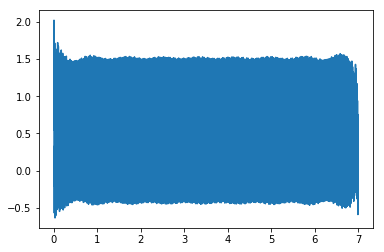

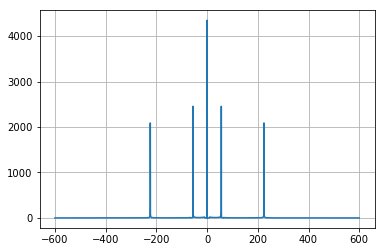

In [88]:
xconv = np.convolve(x, cv.real)
xconv = xconv[:int(0.5*(xconv.shape[0]+1))]
plt.plot(t, xconv)
plt.show()
plt.plot(f, np.abs(np.fft.fftshift(np.fft.fft(xconv))))
plt.grid()
plt.show()

In [74]:
x.shape, xconv.shape

((9000,), (17999,))